<a href="https://colab.research.google.com/github/THANUJAJULURU/deep-learning-keras-tf-tutorial/blob/master/PD%20Using%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import all the Dependencies**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/sample data/Meander_HandPD.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

### **Import data into tensorflow dataset object**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train1",
     seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 368 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['MeanderControl', 'MeanderPatients']

In [ ]:
for image_batch, labels_batch in dataset.take(12):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
(32, 256, 256, 3)
[1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
(32, 256, 256, 3)
[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1]
(32, 256, 256, 3)
[1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
(32, 256, 256, 3)
[1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
(32, 256, 256, 3)
[0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0]
(32, 256, 256, 3)
[1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
(32, 256, 256, 3)
[1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(32, 256, 256, 3)
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
(32, 256, 256, 3)
[0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1]
(16, 256, 256, 3)
[1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1]


###  **Visualize** **some** **of** **the** **images** **from** **our** **dataset** 

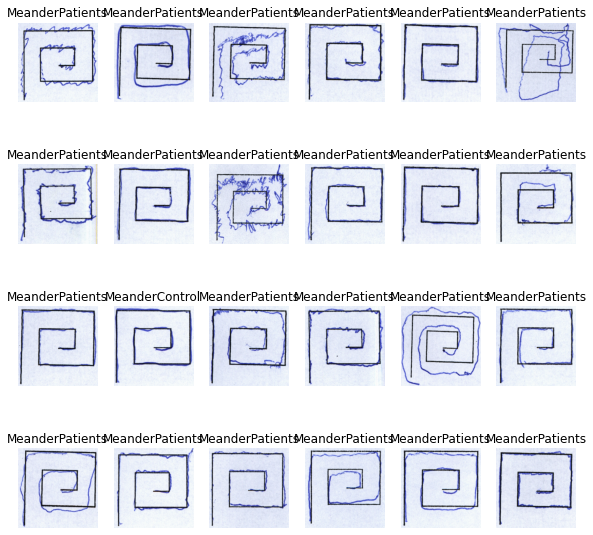

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(24):
        ax = plt.subplot(4, 6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

Now we have to Split the dataset into 3 sets, namely:

Training: Dataset to be used while training

Validation: Dataset to be tested against while training

Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)

12

In [ ]:
train_size = 0.8
len(dataset)*train_size

9.600000000000001

In [ ]:
train_ds = dataset.take(10)
len(train_ds)

10

In [ ]:
test1_ds = dataset.skip(10)
len(test1_ds)

2

In [ ]:
val_size=0.1
len(dataset)*val_size

1.2000000000000002

In [ ]:
val_ds = test1_ds.take(1)
len(val_ds)

1

In [ ]:
test_ds = test1_ds.skip(1)
len(test_ds)

1

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

9
1
2


### **Cache, Shuffle, and Prefetch the Dataset**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### **Data Pre-Processing Resizing and normalization**

Creating a layer for Pre-Processing and Augmentation layers for our Model 

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### **Data Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
len(train_ds)

9

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(train_ds)

9

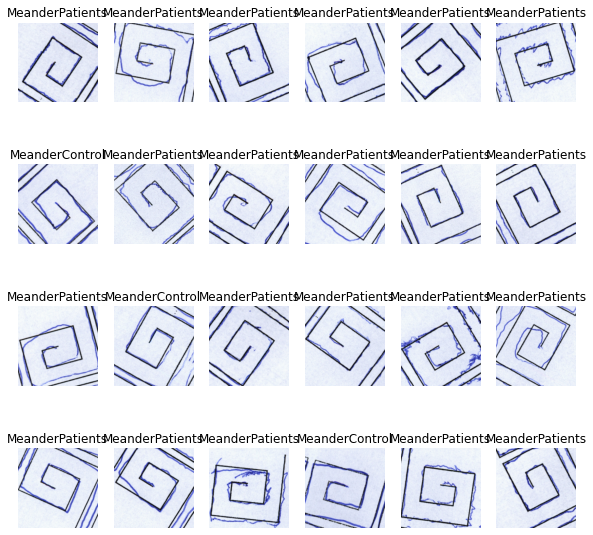

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.skip(8):
    for i in range(24):
        ax = plt.subplot(4, 6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (32, 60, 60, 64)        

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.python import train
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
9/9 [==============================] - 35s 4s/step - loss: 0.7028 - accuracy: 0.8015 - val_loss: 0.5979 - val_accuracy: 0.7812
Epoch 2/5
9/9 [==============================] - 30s 3s/step - loss: 0.5386 - accuracy: 0.8015 - val_loss: 0.5443 - val_accuracy: 0.7812
Epoch 3/5
9/9 [==============================] - 27s 3s/step - loss: 0.5170 - accuracy: 0.8015 - val_loss: 0.5214 - val_accuracy: 0.7812
Epoch 4/5
9/9 [==============================] - 28s 3s/step - loss: 0.5012 - accuracy: 0.8015 - val_loss: 0.5253 - val_accuracy: 0.7812
Epoch 5/5
9/9 [==============================] - 29s 3s/step - loss: 0.4961 - accuracy: 0.8015 - val_loss: 0.5230 - val_accuracy: 0.7812


In [ ]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 4s 826ms/step - loss: 0.4512 - accuracy: 0.8281


In [ ]:
scores = model.evaluate(train_ds)

9/9 [==============================] - 7s 757ms/step - loss: 0.4955 - accuracy: 0.8015


In [ ]:
scores = model.evaluate(val_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.5230 - accuracy: 0.7812


In [ ]:
scores

[0.5229957103729248, 0.78125]

In [ ]:
print(history)
print(history.params)
print(history.history.keys())
print(type(history.history['loss']))
print(len(history.history['loss']))

history.history['loss'][:5] # show loss for first 5 epochs

{'verbose': 1, 'epochs': 5, 'steps': 9}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
<class 'list'>
5


[0.7028163075447083,
 0.5385556221008301,
 0.5170383453369141,
 0.5011770725250244,
 0.4961002469062805]

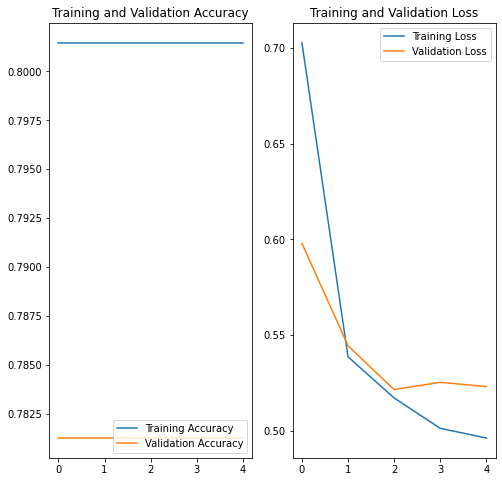

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS=5

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: MeanderPatients
predicted label: MeanderPatients


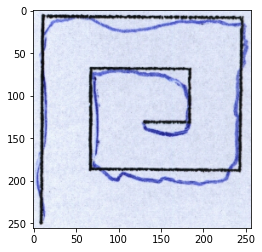

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

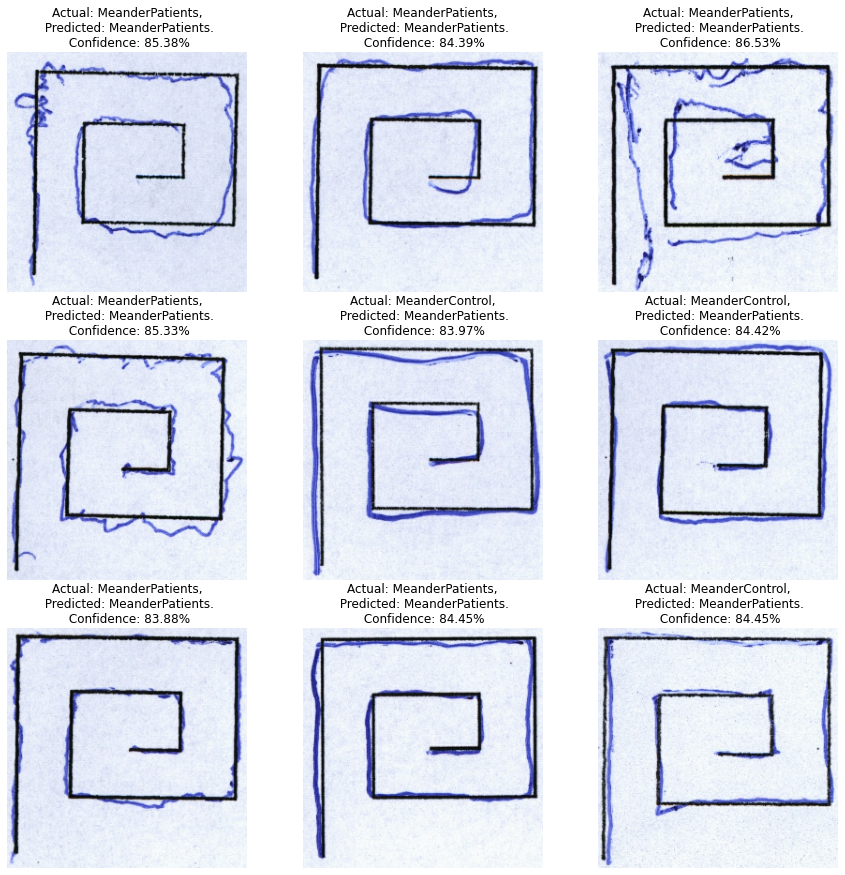

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")